## Decison Trees Classification

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [9]:
# Load dataset
df = pd.read_csv('bank-marketing.csv')

# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

# Display data types and non-null counts
print("\nData info:")
print(df.info())

# Summary statistics for numeric columns
print("\nSummary statistics for numeric columns:")
print(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

First few rows of the dataset:
   age          job marital-status  education default-credit yearly-balance  \
0   30   unemployed        married    primary             no           1787   
1   33     services        married  secondary             no           4789   
2   35   management         single   tertiary             no           1350   
3   30   management        married   tertiary             no           1476   
4   59  blue-collar        married  secondary             no              0   

  housing-loan personal-loan last-contact-type  last-contact-day  \
0           no            no          cellular                19   
1          yes           yes          cellular                11   
2          yes            no          cellular                16   
3          yes           yes           unknown                 3   
4          yes            no           unknown                 5   

  last-contact-month  last-contact-duration-seconds  \
0                oct          

In [10]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'suscribed-term-deposited':  # Skip the target column for now
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Encode the target variable
df['suscribed-term-deposited'] = df['suscribed-term-deposited'].map({'yes': 1, 'no': 0})

# Define features and target
X = df.drop('suscribed-term-deposited', axis=1)
y = df['suscribed-term-deposited']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Check if there are missing values in the target variable
missing_y = y.isnull().sum()
print(f"Missing values in target variable 'y': {missing_y}")

Missing values in target variable 'y': 0


In [12]:
# Initialize and train the classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'\nAccuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


Accuracy: 0.861878453038674

Confusion Matrix:
[[744  63]
 [ 62  36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       807
           1       0.36      0.37      0.37        98

    accuracy                           0.86       905
   macro avg       0.64      0.64      0.64       905
weighted avg       0.86      0.86      0.86       905



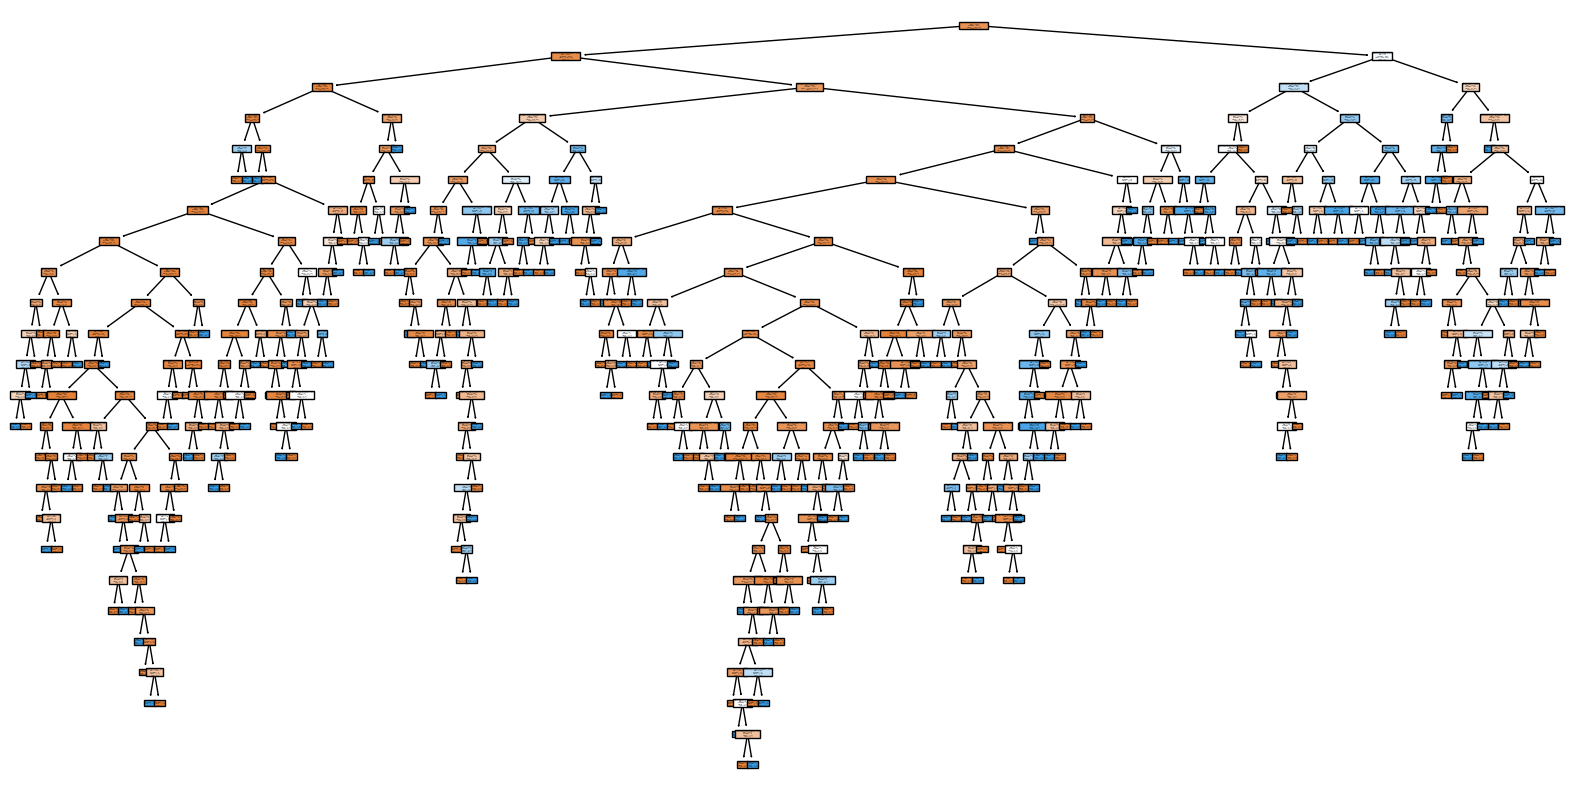

In [13]:
# Plot decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['no', 'yes'])
plt.show()

**Interpretation of Results**

Accuracy: 

The overall accuracy of the model is approximately 86.19%. This means that the model correctly predicts the outcome (whether a client subscribes to a term deposit) 86.19% of the time.


Confusion Matrix:

True Positives (TP): 36 clients were correctly predicted to subscribe to a term deposit.
True Negatives (TN): 744 clients were correctly predicted not to subscribe.
False Positives (FP): 63 clients were incorrectly predicted to subscribe (Type I error).
False Negatives (FN): 62 clients were incorrectly predicted not to subscribe (Type II error).


Classification Report:

Precision for class 1 (subscribing): 36%. This indicates that when the model predicts a client will subscribe, it is correct 36% of the time.
Recall for class 1: 37%. This indicates that the model captures 37% of all actual subscribing clients.
F1-Score for class 1: 37%. This is the harmonic mean of precision and recall, providing a balance between the two.


Imbalance:

The performance for class 1 (subscribing) is significantly lower than for class 0 (not subscribing). This could be indicative of an imbalanced dataset, where there are many more instances of class 0 than class 1.